# Exploration of Neon

Within **thermodynamics**, the Ideal gas law, also known as the general gas equation serves as a well-defined tool for the approximation of the behavior of many gases under diverse condition. We will utilize the Ideal gas law to observe the behavior of a noble gas, $Ne$, when subjected to various temperatures. 

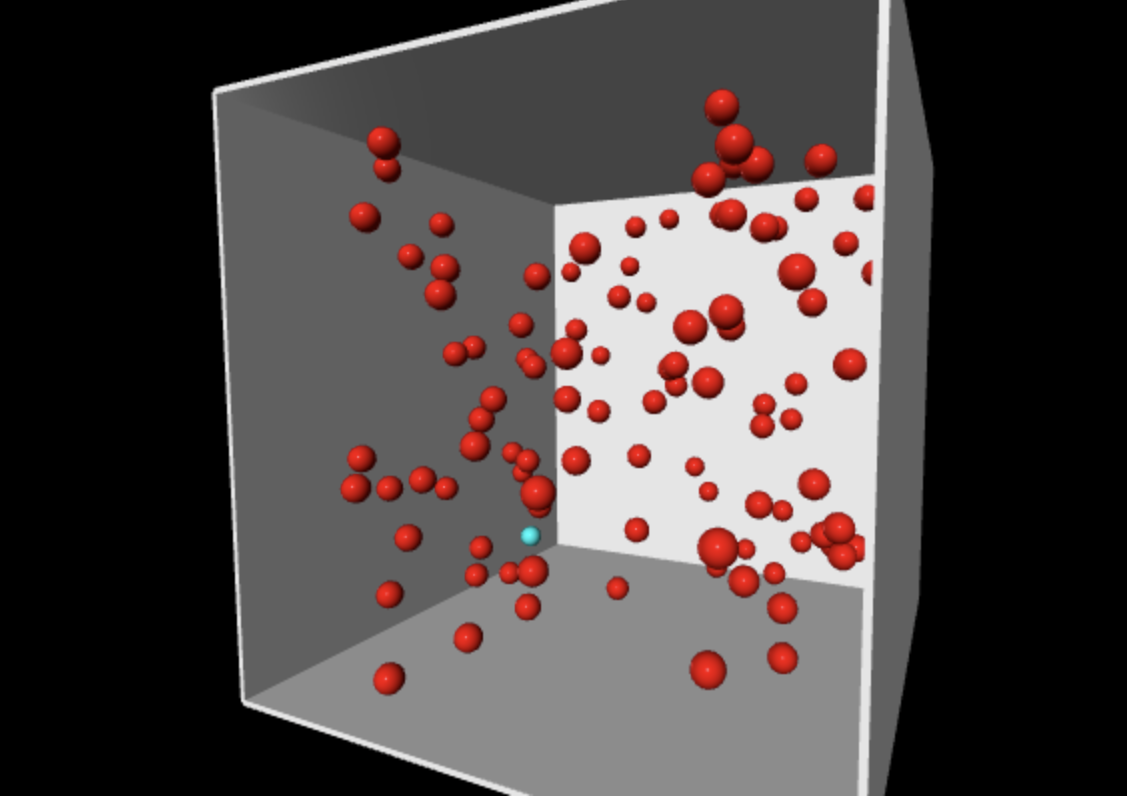

This ideal gas project will model a closed system, with the only variable being the randomization of the starting location of each particle. This will allow us to explore what addition of other variables to the system would entail. 

## Our Research Questions

We will model the behavior of monatomic Neon atoms in a closed system. These atoms will be at two different temperatures to examine the effects of this addition to the system. So:  

 **Can we model the two monoatomic gases of the same mass with different temperatures. How can we calculate the equilibrium temperature of the gas? What do we expect this to look like?** 

## Our Hypothesis

The Kinetic Energy (K) of a monoatomic atom is: 
$$K = \frac{3}{2} k_{b} T_{1}$$

Where $k_{b}$ is the Boltzmann constant, the proportionality factor that relates the average relative kinetic energy of particles in a gas with the thermodynamic temperature of the gas.

The total K of a system of a number of monoatomic atoms $N_{1}$ of one temperature $T_{1}$ is: 
$$K = N_{1} \frac{3}{2}  k_{b}  T_{1}$$

The equilibrium temperature ($T_{eq}$) of a system with constant mass and unequal number of the temperature of each particle is calculated as follows: 

$$T_{eq} =\frac{N_1 T_1 + N_2 T_2}{N_1 + N_2}$$

The total Kinetic energy ($K_{tot}$) of a system filled with two different temperatures ($T_{1}$ and $T_{2}$) should represent all particles ($N_{tot}$) and the equilibrium temperature ($T_{eq}$). 

$$K_{tot} = N_{tot} \frac{3}{2}  k_{b}  T_{eq}$$

With the previous equations in mind, **we should be able to incorporate the total Kinetic Energy (Ktot) of a combined system of all monoatomic atoms of each temperature (Ntot), to calculate its equilibrium temperature (Teq).** 

### $$T_{eq} =\frac{\frac{K_{tot}}{N_{tot}}\left(\frac{2}{3}\right)}{k_{b}}$$

# Physics

Now that we have determined our hypothesis, we must understand the physics to model this system accurately.  

**Assumptions** being made: 

- Assuming Kinetic Energy (K) is constant thus, $K = K_1 + K_2 + \cdots$
- Conservation of momentum ($\vec{p}$), $\vec{p}_{tot} = \vec{p}_1 + \vec{p}_2 + \cdots$ 
- Where $p = m_{1}v_{1}$ where $\vec{v}_{1}$ = velocity vector  
- Elastic velocity 
- Atoms are $Neon$
- $m$ = 3.4 e-26 $kg$
- $R$ = 154e-9 $m$
- ox has length $L = 40*R$
- particles of different temp and same temp collide with one another
- particles have an initial speed based on the equation 


Now that we have listed our assumptions, we will have to include a function that loops through a list of spheres (particles) to calculate if a pair of spheres have collided. 

We have to import the following to effectively model our system: 

In [ ]:
from vpython import *
import numpy as np
import random as rand
import matplotlib.pyplot as plt

Our assumptions of constant K enables us to set the kinetic energy of a particle with speed less than the speed of light to the kinetic energy of a monoatomic particle equal to one another. 

$$\bar{K} \approx \frac{1}{2}m\bar{v^2}$$ 

$$\bar{K} = \frac{3}{2} k_{b} T_{1}$$

$$\frac{1}{2}m\bar{v^2} = \frac{3}{2} k_{b} T_{1}$$ 

To allow the particles to move, they must have an initial speed before collisions. Using the combined equation above for particles moving faster than the speed of light and monoatomic particles, we can find the speed of each temperature. This can be done by solving for the magnitude of the velocity vector `v`. 

This calculation can be seen with the code on `line 11` through `line 12` beneath the defining of our constants

`s1 =  np.sqrt(2*3/2*k*T1/m) #initial speed of cold (blue)`

`s2 =  np.sqrt(2*3/2*k*T2/m) #initial speed of hot (red)`

## Collision Calculations

Now that we have calculated the starting speeds for each particle based on their temperatures, we can start creating the movement of these particles to discover if we can model the equilibrium temperature. 


The cells below calculate the new velocity, momentum, and position of the pairs of colliding spheres (particles) in our global particle list. 

In [ ]:
def calc_collision(i,j):
    """Calculate new velocity, momentum, and position of pairs of colliding spheres in the global particles[] list. 

    Keyword arguments:
    i -- index of one colliding sphere
    j -- index of second colliding sphere

    """

    global particles
    
    r1 = particles[i].pos
    r2 = particles[j].pos
    v1 = particles[i].v
    v2 = particles[j].v
    p1 = m*v1
    p2 = m*v2
    v1i = v1
    v2i = v2
    
    #transform to reference frame of particle 1
    v2rel = v2 - v1
    r2rel = r2 - r1
    
    #find time when collision ocurred
    dx = dot(r2rel, hat(v2rel))
    dy = mag(cross(r2rel, hat(v2rel)))
    alpha = asin(dy/2/R)
    d = 2*R*cos(alpha) + dx
    deltat = d/mag(v2rel)
    
    #move particles backward in time to their locations at the collision
    particles[i].pos = particles[i].pos - particles[i].v*deltat
    particles[j].pos = particles[j].pos - particles[j].v*deltat
    
    #calculate new momenta using CM reference frame
    r1 = particles[i].pos
    r2 = particles[j].pos
    M = 2*m #total mass
    ptot = p1+p2 #total momentum
    vcm = ptot/M
    v1rel = v1 - vcm
    v2rel = v2 - vcm
    p1rel = m*v1rel
    p2rel = m*v2rel
    r = r2 - r1
    p1rel = p1rel - 2*dot(p1rel,hat(r))*hat(r)
    p2rel = p2rel - 2*dot(p2rel,hat(r))*hat(r)
    v1rel = p1rel/m
    v2rel = p2rel/m
    v1 = vcm + v1rel
    v2 = vcm + v2rel
    p1 = m*v1
    p2 = m*v2
    particles[i].v = v1
    particles[j].v = v2

    #move particles forward in time to their locations at the end of the time step
    particles[i].pos = particles[i].pos + particles[i].v*deltat
    particles[j].pos = particles[j].pos + particles[j].v*deltat

In [ ]:
def check_collisions():
    """Determine all pairs of colliding spheres in the global particles[] list. 
        
    """
    collided_pairs = [] #a list of pairs of spheres that are overlapping
    N = len(particles) #number of particles
    for i in range(N):
        for j in range(i+1,N): #start at i+1 to avoid double counting and to avoid self-collision
            d = mag(particles[i].pos - particles[j].pos)
            if d < 2*R:
                collided_pairs.append([i,j])            
    
    return collided_pairs

## The cell below contains the constant and visual objects for the scene and the rerandomization of positions following collisions

In [ ]:
scene = canvas(title="N Particles in a Box")

#constants
m = 3.4e-26 #mass of atom in kg
R = 154e-9 #radius of atom in m
L = 40*R #length of box in m
thick = L/100 #thickness of box wall in m
k = 1.4e-23 #boltzmann constant
T1 = 200 #temp in K
T2 = 500 #temp in K 
s1 =  np.sqrt(2*3/2*k*T1/m) #initial speed of cold (blue)
s2 =  np.sqrt(2*3/2*k*T2/m) #initial speed of hot (red)
    
#visual objects
Lwall = box(pos = vec(-L/2, 0, 0), size = vec(thick, L, L), color=color.white)
Rwall = box(pos = vec(L/2, 0, 0), size = vec(thick, L, L), color=color.white)
Bwall = box(pos = vec(0, -L/2, 0), size = vec(L, thick, L), color=color.white)
Twall = box(pos = vec(0, L/2, 0), size = vec(L, thick, L), color=color.white)
Zwall = box(pos = vec(0, 0, -L/2), size = vec(L, L, thick), color=color.white)
Mwall = box(pos = vec(0, 0, 0), size = vec(thick, L, L), color=color.purple)

particles = [] #list of particles

N1=50 #number of particles at temperature 1
N2=50 # number of particles at temperature 2
N = N1 + N2 #total number of all particles in system 

#create left particles
for i in range(N1):
    if i==0:
        particle = sphere(pos = L/2*vec(rand.uniform(-0.9,-0.1),rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9)), radius = R, color = color.magenta, make_trail = True)
    else:
        particle = sphere(pos = L/2*vec(rand.uniform(-0.9,-0.1),rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9)), radius = R, color = color.red)

    #initial velocity
    particle.v = s1*hat(vec(rand.uniform(-1,1), rand.uniform(-1,1), rand.uniform(-1,1)))
    particle.p = m*particle.v

    particles.append(particle)

#check for collisions and rerandomize positions of particles that are collided
collided_pairs = check_collisions()
while len(collided_pairs)!=0:
    for pair in collided_pairs:
        particles[pair[0]].pos = L/2*vec(rand.uniform(-.9,-.1),rand.uniform(-.9,.9),rand.uniform(-.9,.9))
        particles[pair[1]].pos = L/2*vec(rand.uniform(-.9,-.1),rand.uniform(-.9,.9),rand.uniform(-1,1))
    collided_pairs = check_collisions()
    
#create right particles
for i in range(N2):
    if i==0:
        particle = sphere(pos = L/2*vec(rand.uniform(0.1,0.9),rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9)), radius = R, color = color.blue)
    else:
        particle = sphere(pos = L/2*vec(rand.uniform(0.1,0.9),rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9)), radius = R, color = color.blue)

    #initial velocity
    particle.v = s2*hat(vec(rand.uniform(-1,1), rand.uniform(-1,1), rand.uniform(-1,1)))
    particle.p = m*particle.v

    particles.append(particle)
    
#check for collisions and rerandomize positions of particles that are collided
collided_pairs = check_collisions()
while len(collided_pairs)!=0:
    for pair in collided_pairs:
        particles[pair[0]].pos = L/2*vec(rand.uniform(.1,.9),rand.uniform(-.9,.9),rand.uniform(-.9,.9))
        particles[pair[1]].pos = L/2*vec(rand.uniform(.1,.9),rand.uniform(-.9,.9),rand.uniform(-.9,.9))
    collided_pairs = check_collisions()

#time
t = 0
dt = R/s1/10

#evolution
scene.pause()

Nsteps = 1e4 #number of time steps for the loop
while t < Nsteps*dt:
    rate(1000) #sets number of loops per second in order to slow down or speed up visualization

    #update position of each particle
    for particle in particles:
        particle.pos = particle.pos + particle.v*dt
        
    #handle collisions of particles with each other
    collided_pairs = check_collisions()
    for pair in collided_pairs:
        i = pair[0]
        j = pair[1]
        calc_collision(i,j)
       
    #handle collision with walls
    for particle in particles:
        
        #collision with L and R walls
        if particle.pos.x > L/2:
            particle.v.x = - abs(particle.v.x)
            particle.p = m*particle.v
        elif particle.pos.x < -L/2:
            particle.v.x = abs(particle.v.x)
            particle.p = m*particle.v
            
        #collision with B and T walls
        if particle.pos.y > L/2:
            particle.v.y = - abs(particle.v.y)
            particle.p = m*particle.v
        elif particle.pos.y < -L/2:
            particle.v.y = abs(particle.v.y)
            particle.p = m*particle.v

        #collsion with Z wall
        if particle.pos.z > L/2:
            particle.v.z = - abs(particle.v.z)
            particle.p = m*particle.v
        elif particle.pos.z < -L/2:
            particle.v.z = abs(particle.v.z)
            particle.p = m*particle.v

    t = t + dt

## Validation of our code

In [ ]:
Ktot = 0
for particle in particles:
    K = 1/2*m*mag(particle.v)**2
    Ktot = Ktot + K

#represents Teq calculation according to our hypothesis (theory)
Teq = ((N1*T1) + (N2*T2))/(N1+N2)
#represents Teq cacluation according to our code (simulation)
Teqsim = Ktot/N*2/3/k

print("Teq from sim = ", Teqsim, "K")

print("Teq from theory = ", Teq, "K")

As you can see from the printed values above, our simulation calculations of $T_{eq}$ matches our theory calculations however, to ensure our theory is correct, we will calculate all the particles' total kinetic energy at `t = 0`. Then using the previously determined kinetic energy we will update `Ktot`. The updated `Ktot` value will still be utilized to solve for the equilibrium temperature of the simulation (`Teq from sem`) using the average kinetic energy of a gas molecule. Finally, both `Teq theory` and `Teq sim` will be printed to determine if our values were identical as expected. 

## Change in the ratio of particles at each temperature 

In the previous code, the ratio of particles at each temperature was $50:50$ and displayed an equilibrium temperature equal to the average of the two varying temperatures. We changed the ratio of $N_{1}$ and $N_{2}$ to $30$ and $70$, respectively, to see how the $T_{eq}$ of the system is affected. 

In [ ]:
scene = canvas(title="N Particles in a Box") #builds scene

#constants
m = 3.4e-26 #mass of atom in kg
R = 154e-9 #radius of atom in m
L = 40*R #length of box in m
thick = L/100 #thickness of box wall in m
k = 1.4e-23 #boltzmann constant
T1 = 200 #temp in K 
T2 = 500 #temp in K 
s1 =  np.sqrt(2*3/2*k*T1/m) #initial speed of cold (blue)
s2 =  np.sqrt(2*3/2*k*T2/m) #initial speed of hot (red)

    
#visual objects
Lwall = box(pos = vec(-L/2, 0, 0), size = vec(thick, L, L), color=color.white)
Rwall = box(pos = vec(L/2, 0, 0), size = vec(thick, L, L), color=color.white)
Bwall = box(pos = vec(0, -L/2, 0), size = vec(L, thick, L), color=color.white)
Twall = box(pos = vec(0, L/2, 0), size = vec(L, thick, L), color=color.white)
Zwall = box(pos = vec(0, 0, -L/2), size = vec(L, L, thick), color=color.white)
Mwall = box(pos = vec(0, 0, 0), size = vec(thick, L, L), color=color.purple)

particles = [] #list of particles

"the values below in cell 27 and 28 were changed"

N1=30 #number of particles at temperature 1 
N2=70 # number of particles at temperature 2
N = N1 + N2 #total number of all particles in system

#create left particles
for i in range(N1):
    if i==0:
        particle = sphere(pos = L/2*vec(rand.uniform(-0.9,-0.1),rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9)), radius = R, color = color.magenta, make_trail = True)
    else:
        particle = sphere(pos = L/2*vec(rand.uniform(-0.9,-0.1),rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9)), radius = R, color = color.red)

    #initial velocity
    particle.v = s1*hat(vec(rand.uniform(-1,1), rand.uniform(-1,1), rand.uniform(-1,1)))
    particle.p = m*particle.v

    particles.append(particle)

#check for collisions and rerandomize positions of particles that are collided
collided_pairs = check_collisions()
while len(collided_pairs)!=0:
    for pair in collided_pairs:
        particles[pair[0]].pos = L/2*vec(rand.uniform(-.9,-.1),rand.uniform(-.9,.9),rand.uniform(-.9,.9))
        particles[pair[1]].pos = L/2*vec(rand.uniform(-.9,-.1),rand.uniform(-.9,.9),rand.uniform(-1,1))
    collided_pairs = check_collisions()
    
#create right particles
for i in range(N2):
    if i==0:
        particle = sphere(pos = L/2*vec(rand.uniform(0.1,0.9),rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9)), radius = R, color = color.blue)
    else:
        particle = sphere(pos = L/2*vec(rand.uniform(0.1,0.9),rand.uniform(-0.9,0.9),rand.uniform(-0.9,0.9)), radius = R, color = color.blue)

    #initial velocity
    particle.v = s2*hat(vec(rand.uniform(-1,1), rand.uniform(-1,1), rand.uniform(-1,1)))
    particle.p = m*particle.v

    particles.append(particle)
    
#check for collisions and rerandomize positions of particles that are collided
collided_pairs = check_collisions()
while len(collided_pairs)!=0:
    for pair in collided_pairs:
        particles[pair[0]].pos = L/2*vec(rand.uniform(.1,.9),rand.uniform(-.9,.9),rand.uniform(-.9,.9))
        particles[pair[1]].pos = L/2*vec(rand.uniform(.1,.9),rand.uniform(-.9,.9),rand.uniform(-.9,.9))
    collided_pairs = check_collisions()

#time
t = 0
dt = R/s1/10

#evolution
scene.pause()

Nsteps = 1e4 #number of time steps for the loop
while t < Nsteps*dt:
    rate(1000) #sets number of loops per second in order to slow down or speed up visualization

    #update position of each particle
    for particle in particles:
        particle.pos = particle.pos + particle.v*dt
        
    #handle collisions of particles with each other
    collided_pairs = check_collisions()
    for pair in collided_pairs:
        i = pair[0]
        j = pair[1]
        calc_collision(i,j)
       
    #handle collision with walls
    for particle in particles:
        
        #collision with L and R walls
        if particle.pos.x > L/2:
            particle.v.x = - abs(particle.v.x)
            particle.p = m*particle.v
        elif particle.pos.x < -L/2:
            particle.v.x = abs(particle.v.x)
            particle.p = m*particle.v
            
        #collision with B and T walls
        if particle.pos.y > L/2:
            particle.v.y = - abs(particle.v.y)
            particle.p = m*particle.v
        elif particle.pos.y < -L/2:
            particle.v.y = abs(particle.v.y)
            particle.p = m*particle.v

        #collsion with Z wall
        if particle.pos.z > L/2:
            particle.v.z = - abs(particle.v.z)
            particle.p = m*particle.v
        elif particle.pos.z < -L/2:
            particle.v.z = abs(particle.v.z)
            particle.p = m*particle.v

    t = t + dt

## Validation of the change in ratio of particles

In [ ]:
Ktot = 0
for particle in particles:
    K = 1/2*m*mag(particle.v)**2
    Ktot = Ktot + K

#represents Teq calculation according to our hypothesis (theory)
Teq = ((N1*T1) + (N2*T2))/(N1+N2)
#represents Teq cacluation according to our code (simulation)
Teqsim = Ktot/N*2/3/k

print("Teq from sim = ", Teqsim, "K")

print("Teq from theory = ", Teq, "K")

## Conclusions

As seen in the cell above, we were able to replicate the equillibrium temperature, $T_{eq}$, from theory in our simulation. 
We created an ideal gas of neon atoms at various temperatures and our overall objective of this experiment was to find the temperature at which $neon$ atoms reached equilibrium. We were able to resolve and validate our question through this simulation. 